In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt

# 1. Êî∂ÈõÜÊï∞ÊçÆ

## 1.1 Êî∂ÈõÜÁãóÁßçÁ±ªÈ¢ÑÊµãÊï∞ÊçÆ

In [2]:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'

In [3]:
# Ëé∑ÂèñÁãóÁßçÁ±ªÈ¢ÑÊµãÊï∞ÊçÆÂπ∂ÂÜôÂÖ•DataFrame
df_type = pd.read_table(url, sep='\t', header=0)

In [4]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [5]:
df_type.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [6]:
df_type.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

## Êî∂ÈõÜÊØèÊù°Êé®ÁâπÁöÑËΩ¨ÂèëÊï∞ÂíåÂñúÊ¨¢Êï∞

In [7]:
with open('tweet_json.txt', 'r') as files:
    tweets = []
    data = files.readlines()
    for line in data:
        x = json.loads(line)
        tweet = {}
        tweet['tweet_id'] = x['id']
        tweet['favorite_count'] = x['favorite_count']
        tweet['retweet_count'] = x['retweet_count']
        tweets.append(tweet)

In [8]:
df_tweets = pd.DataFrame(tweets)

In [9]:
df_tweets.head()

favorite_count  retweet_count            tweet_id
0           39492           8842  892420643555336193
1           33786           6480  892177421306343426
2           25445           4301  891815181378084864
3           42863           8925  891689557279858688
4           41016           9721  891327558926688256

## 1.3 Êî∂ÈõÜÊØèÊù°Êé®ÁâπÁöÑÂÆåÊï¥Êï∞ÊçÆ

In [10]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [11]:
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [14]:
# tidiness issue 1
# ‰ΩøÁî®ÁºñÁ®ãËØÑ‰º∞ÔºàDataFrame.describeÔºâÂèëÁé∞Êúâ‰∫õÊé®Áâπ‰∏∫ËΩ¨ÂèëÔºåÊúâ181Êù°Êé®ÁâπÊúâËΩ¨ÂèëÊï∞ÊçÆÔºåÊØîÂ¶Çretweeted_status_user_id
# Ê≠§‰∏∫Êï∞ÊçÆÊ†ºÂºèÈóÆÈ¢òÔºåËøô‰∫õÊù°ÁõÆÂ∫îËØ•‰∫à‰ª•Âà†Èô§
# ËΩ¨ÂèëÁöÑÊé®ÁâπÁöÑidËÆ∞ÂΩïÂú®df_retweet_id
df_retweet_id = df[df['retweeted_status_user_id'].isnull()==False]['tweet_id']

In [15]:
len(df_retweet_id)

181

# 2. ËØÑ‰º∞ÂèäÊ∏ÖÁêÜÊï∞ÊçÆ

In [16]:
print('Length of df_type: ' + str(len(df_type)))
print('Length of df_tweets: ' + str(len(df_tweets)))
print('Length of df: ' + str(len(df)))

Length of df_type: 2075
Length of df_tweets: 2352
Length of df: 2356


In [17]:
df_type_copy = df_type.copy()
df_tweets_copy = df_tweets.copy()
df_copy = df.copy()

In [18]:
df_copy = df_copy.join(df_type_copy.jpg_url)
df_copy = df_copy.join(df_type_copy.p1)
df_copy = df_copy.join(df_type_copy.p1_dog)
df_copy = df_copy.join(df_type_copy.p2)
df_copy = df_copy.join(df_type_copy.p2_dog)
df_copy = df_copy.join(df_type_copy.p3)
df_copy = df_copy.join(df_type_copy.p3_dog)
df_copy = df_copy.join(df_tweets_copy.retweet_count)
df_copy = df_copy.join(df_tweets_copy.favorite_count)
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])

In [19]:
df_copy = df_copy.drop([
                        'in_reply_to_status_id', 
                        'in_reply_to_user_id', 
                        'source', 
                        'retweeted_status_id', 
                        'retweeted_status_timestamp', 
                        'expanded_urls'], 
                        axis=1)

In [20]:
df_copy['rating_numerator'] = pd.to_numeric(df_copy['rating_numerator'], 
                                                     errors='ignore', 
                                                     downcast='float')
df_copy['rating_denominator'] = pd.to_numeric(df_copy['rating_denominator'], 
                                                     errors='ignore', 
                                                     downcast='float')

In [21]:
df_copy_original = df_copy.copy()

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                    2356 non-null int64
timestamp                   2356 non-null datetime64[ns]
text                        2356 non-null object
retweeted_status_user_id    181 non-null float64
rating_numerator            2356 non-null float32
rating_denominator          2356 non-null float32
name                        2356 non-null object
doggo                       2356 non-null object
floofer                     2356 non-null object
pupper                      2356 non-null object
puppo                       2356 non-null object
jpg_url                     2075 non-null object
p1                          2075 non-null object
p1_dog                      2075 non-null object
p2                          2075 non-null object
p2_dog                      2075 non-null object
p3                          2075 non-null object
p3_dog                      2075 non-null object
re

In [23]:
df_copy_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                    2356 non-null int64
timestamp                   2356 non-null datetime64[ns]
text                        2356 non-null object
retweeted_status_user_id    181 non-null float64
rating_numerator            2356 non-null float32
rating_denominator          2356 non-null float32
name                        2356 non-null object
doggo                       2356 non-null object
floofer                     2356 non-null object
pupper                      2356 non-null object
puppo                       2356 non-null object
jpg_url                     2075 non-null object
p1                          2075 non-null object
p1_dog                      2075 non-null object
p2                          2075 non-null object
p2_dog                      2075 non-null object
p3                          2075 non-null object
p3_dog                      2075 non-null object
re

In [24]:
df_copy.describe()

tweet_id  retweeted_status_user_id  rating_numerator  \
count  2.356000e+03              1.810000e+02       2356.000000   
mean   7.427716e+17              1.241698e+16         13.126486   
std    6.856705e+16              9.599254e+16         45.876648   
min    6.660209e+17              7.832140e+05          0.000000   
25%    6.783989e+17              4.196984e+09         10.000000   
50%    7.196279e+17              4.196984e+09         11.000000   
75%    7.993373e+17              4.196984e+09         12.000000   
max    8.924206e+17              7.874618e+17       1776.000000   

       rating_denominator  retweet_count  favorite_count  
count         2356.000000    2352.000000     2352.000000  
mean            10.455433    3134.932398     8109.198980  
std              6.745237    5237.846296    11980.795669  
min              0.000000       0.000000        0.000000  
25%             10.000000     618.000000     1417.000000  
50%             10.000000    1456.500000     3596.500000  
75%             10.000000    3628.750000    10118.000000  
max            170.000000   79116.000000   132318.000000

## Tidiness issue 1

### ÂÆö‰πâ
‰ΩøÁî®ÁºñÁ®ãËØÑ‰º∞ÔºàDataFrame.describeÔºâÂèëÁé∞Êúâ‰∫õÊé®Áâπ‰∏∫ËΩ¨ÂèëÔºåÊúâ181Êù°Êé®ÁâπÊúâËΩ¨ÂèëÊï∞ÊçÆÔºåÊØîÂ¶Çretweeted_status_user_idÔºåËøô‰∫õÊï∞ÊçÆÈúÄË¶ÅÂà†Èô§„ÄÇ

### Ê∏ÖÊ¥ó‰ª£Á†Å
Âà†Èô§‰∏∫ËΩ¨ÂèëÁöÑÊù°ÁõÆ

In [25]:
# ËΩ¨ÂèëÁöÑÊé®ÁâπÁöÑidËÆ∞ÂΩïÂú®df_retweet_id
df_retweet_id = df_copy[df_copy['retweeted_status_user_id'].isnull()==False]['tweet_id']

# Âà†Èô§‰∏∫ËΩ¨ÂèëÁöÑÊé®Áâπ
for id in list(df_copy['tweet_id']):
    if id in list(df_retweet_id):
        df_copy = df_copy[df_copy['tweet_id']!=id]

### ÊµãËØï

In [26]:
# Êü•Áúãdf_copyÊòØÂê¶ËøòÂ≠òÊúâËΩ¨ÂèëÁöÑÊé®Áâπ
len(df_copy[df_copy['retweeted_status_user_id'].isnull()==False]['tweet_id'])

0

## Tidiness issue 2

### ÂÆö‰πâ
‰ΩøÁî®ÁõÆÊµãËØÑ‰º∞ÂèëÁé∞stageÂàÜ‰∏∫ÂõõÂàó„ÄÇÂõ†‰∏∫ËøôÊòØÂêå‰∏ÄÁßçÁ±ªÂûãÁöÑÊï∞ÊçÆÔºåÊâÄ‰ª•‰∏çÈúÄË¶ÅÂàÜ‰∏∫ÂõõÂàóÔºåÂ∫îÂêàÂπ∂ÂîØ‰∏ÄÂàó„ÄÇ

### Ê∏ÖÊ¥ó‰ª£Á†Å

In [27]:
# ËÆ∞ÂΩïÊØèÊù°Êé®Áâπ‰∏≠ÁãóÁöÑstageÔºåÂêåÊó∂‰ΩøÁî®ÁºñÁ®ãËØÑ‰º∞ÂèëÁé∞Êúâ‰∫õÁãóÊúâÂ§ö‰∏™stage„ÄÇ
# ÂêåÊó∂‰πüÁî®multi_stagesÂèòÈáèËÆ∞ÂΩï‰∏ãÊã•ÊúâÂ§ö‰∏™stageÁöÑÁãóÁöÑtweet_idÂíåÁõ∏Â∫îÁöÑstagesÔºå‰∏∫ÂêéÁª≠Â§ÑÁêÜÈóÆÈ¢òÂÅöÂáÜÂ§á„ÄÇ
stages = []
for i in range(2356):
    temp = []
    if i in df_copy.index:
        if df_copy['doggo'][i] != 'None':
            temp.append(df_copy['doggo'][i])
        if df_copy['floofer'][i] != 'None':
            temp.append(df_copy['floofer'][i])
        if df_copy['pupper'][i] != 'None':
            temp.append(df_copy['pupper'][i])
        if df_copy['puppo'][i] != 'None':
            temp.append(df_copy['puppo'][i])
        if len(temp)>=2:
            stages.append({'tweet_id': df_copy['tweet_id'][i], 'stage': temp})
        elif len(temp)==1:
            stages.append({'tweet_id': df_copy['tweet_id'][i], 'stage': temp[0]})
        else:
            stages.append({'tweet_id': df_copy['tweet_id'][i], 'stage': np.nan})

# Â∞ÜÁãóÁöÑÂõõÂàóstageÂêàÂπ∂‰∏∫‰∏ÄÂàó
df_stages = pd.DataFrame(stages, columns=['tweet_id', 'stage'])
df_stages.head()
df_copy = df_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
df_copy.insert(loc=6, column='stage', value=df_stages['stage'])

### ÊµãËØï

In [28]:
# stage‰∏∫ÈùûÁ©∫ÂÄºÁöÑÊé®ÁâπÊúâ317Êù°
len(df_copy[pd.isnull(df_copy['stage']) == False])

317

In [29]:
# Êã•ÊúâÂ§ö‰∏™stageÁöÑÊé®ÁâπÂ∞ÜÂ§ö‰∏™stage‰ª•ÂàóË°®ÂΩ¢ÂºèËÆ∞ÂΩï
df_copy[pd.isnull(df_copy['stage']) == False]

tweet_id           timestamp  \
9     890240255349198849 2017-07-26 15:59:51   
12    889665388333682689 2017-07-25 01:55:32   
14    889531135344209921 2017-07-24 17:02:04   
28    886680336477933568 2017-07-16 20:14:00   
40    884562892145688576 2017-07-11 00:00:02   
43    884162670584377345 2017-07-09 21:29:42   
46    883360690899218434 2017-07-07 16:22:55   
53    881906580714921986 2017-07-03 16:04:48   
67    879376492567855104 2017-06-26 16:31:08   
75    878281511006478336 2017-06-23 16:00:04   
84    876484053909872640 2017-06-18 16:57:37   
86    875747767867523072 2017-06-16 16:11:53   
88    875097192612077568 2017-06-14 21:06:43   
89    875021211251597312 2017-06-14 16:04:48   
96    873580283840344065 2017-06-10 16:39:04   
98    873213775632977920 2017-06-09 16:22:42   
108   871515927908634625 2017-06-04 23:56:03   
115   870374049280663552 2017-06-01 20:18:38   
119   869772420881756160 2017-05-31 04:27:59   
149   863079547188785154 2017-05-12 17:12:53   
172   858843525470990336 2017-05-01 00:40:27   
189   855860136149123072 2017-04-22 19:05:32   
206   852672615818899456 2017-04-13 23:59:28   
213   851591660324737024 2017-04-11 00:24:08   
214   851464819735769094 2017-04-10 16:00:07   
249   845306882940190720 2017-03-24 16:10:40   
253   844704788403113984 2017-03-23 00:18:10   
255   844223788422217728 2017-03-21 16:26:50   
257   843856843873095681 2017-03-20 16:08:44   
268   841439858740625411 2017-03-14 00:04:30   
...                  ...                 ...   
1696  681242418453299201 2015-12-27 22:37:04   
1701  680940246314430465 2015-12-27 02:36:20   
1710  680583894916304897 2015-12-26 03:00:19   
1718  680176173301628928 2015-12-25 00:00:11   
1724  680085611152338944 2015-12-24 18:00:19   
1728  679872969355714560 2015-12-24 03:55:21   
1736  679722016581222400 2015-12-23 17:55:32   
1742  679462823135686656 2015-12-23 00:45:35   
1751  678991772295516161 2015-12-21 17:33:48   
1757  678764513869611008 2015-12-21 02:30:45   
1758  678755239630127104 2015-12-21 01:53:54   
1766  678399652199309312 2015-12-20 02:20:55   
1769  678380236862578688 2015-12-20 01:03:46   
1775  678021115718029313 2015-12-19 01:16:45   
1777  677918531514703872 2015-12-18 18:29:07   
1781  677698403548192770 2015-12-18 03:54:25   
1788  677557565589463040 2015-12-17 18:34:46   
1791  677335745548390400 2015-12-17 03:53:20   
1795  677314812125323265 2015-12-17 02:30:09   
1798  677228873407442944 2015-12-16 20:48:40   
1801  676957860086095872 2015-12-16 02:51:45   
1802  676949632774234114 2015-12-16 02:19:04   
1806  676936541936185344 2015-12-16 01:27:03   
1812  676811746707918848 2015-12-15 17:11:09   
1813  676776431406465024 2015-12-15 14:50:49   
1816  676606785097199616 2015-12-15 03:36:42   
1823  676533798876651520 2015-12-14 22:46:41   
1830  676219687039057920 2015-12-14 01:58:31   
1836  676098748976615425 2015-12-13 17:57:57   
1838  675898130735476737 2015-12-13 04:40:46   

                                                   text  \
9     This is Cassie. She is a college pup. Studying...   
12    Here's a puppo that seems to be on the fence a...   
14    This is Stuart. He's sporting his favorite fan...   
28    This is Derek. He's late for a dog meeting. 13...   
40    This is Kevin. He's just so happy. 13/10 what ...   
43    Meet Yogi. He doesn't have any important dog m...   
46    Meet Grizzwald. He may be the floofiest floofe...   
53    This is Rey. He's a Benebop Cumberfloof. 12/10...   
67    This is Jack AKA Stephen Furry. You're not sco...   
75    Meet Shadow. In an attempt to reach maximum zo...   
84    This is Benedict. He wants to thank you for th...   
86    This is Goose. He's a womanizer. Cheeky as h*c...   
88    You'll get your package when that precious man...   
89    Guys please stop sending pictures without any ...   
96    We usually don't rate Deck-bound Saskatoon Bla...   
98    This is Sierra. She's one precious pupper. Abs...   
108   This is Napolean. He's a Ragge

## Quality issue 1

### ÂÆö‰πâ
‰ΩøÁî®ÁºñÁ®ãËØÑ‰º∞ÔºàDataFrame.infoÔºâÂèëÁé∞Êúâ279Êù°Êé®ÁâπÁöÑjpg_url‰∏∫Á©∫ÂÄºÔºåËøô‰∫õÊé®ÁâπÊó†Ê≥ï‰ΩøÁî®Á•ûÁªèÁΩëÁªúÈ¢ÑÊµãÂõæÁâáÊòØÂê¶‰∏∫ÁãóÔºåÊïÖÈúÄË¶ÅÂà†Èô§„ÄÇ

In [30]:
len(df_copy[pd.isnull(df_copy['jpg_url']) == True])

279

### Ê∏ÖÊ¥ó‰ª£Á†Å

In [31]:
# ËÆ∞ÂΩïÊ≤°ÊúâÂõæÁâáurlÁöÑid
no_jpg_id = df_copy[df_copy['jpg_url'].isnull()]['tweet_id']

In [32]:
# Âà†Èô§Ê≤°ÊúâÂõæÁâáÁöÑÊï∞ÊçÆ
for id in list(df_copy['tweet_id']):
    if id in list(no_jpg_id):
        df_copy = df_copy[df_copy['tweet_id']!=id]
print(len(df_copy))

1896


### ÊµãËØï

In [33]:
len(df_copy[pd.isnull(df_copy['jpg_url']) == True])

0

## Quality issue 2

### ÂÆö‰πâ
Êúâ‰∫õÊù°ÁõÆ‰∏≠nameÈ¶ñÂ≠óÊØçÊ≤°ÊúâÂ§ßÂÜô„ÄÅÊúâ‰∫õÈïøÂ∫¶Â∞ë‰∫é2‰∏™Â≠óÊØçÔºåÈúÄË¶ÅÊâæÂá∫Ëøô‰∫õÊù°ÁõÆÔºåÂà§Êñ≠ÊòØÂêçÂ≠óÊà™ÂèñÈîôËØØËøòÊòØÊ≤°ÊúâÂêçÂ≠óÔºõËã•ÂêçÂ≠óÈîôËØØÔºåÂà†Èô§„ÄÇ

In [34]:
# ‰ΩøÁî®ÁºñÁ®ãËØÑ‰º∞ÊâæÂá∫È¶ñÂ≠óÊØçÊ≤°ÊúâÂ§ßÂÜôÁöÑ„ÄÅÈïøÂ∫¶Â∞ë‰∫é2‰∏™Â≠óÊØçÁöÑÊàñÂêçÂ≠ó‰∏∫Á©∫ÂÄºÁöÑname
not_upper_name_id = []
length_2 = []
for i in range(2356):
    if i in df_copy.index:
        if df_copy['name'][i][0].isupper()==False:
            not_upper_name_id.append({'tweet_id': df_copy['tweet_id'][i], 'name': df_copy['name'][i]})
        elif len(df_copy['name'][i])<=2:
            length_2.append({'tweet_id': df_copy['tweet_id'][i], 'name': df_copy['name'][i]})
print('Number of wrong names: ' + str(len(not_upper_name_id)))
print('Number of names having length less than 2: ' + str(len(length_2)))

Number of wrong names: 68
Number of names having length less than 2: 11


In [35]:
# ÈÄöËøáÁõÆÊµãËØÑ‰º∞ÔºåÈ¶ñÂ≠óÊØçÊ≤°ÊúâÂ§ßÂÜôÁöÑnameÈÉΩÊòØÈîôËØØÁöÑÂêçÂ≠ó
not_upper_name_id = pd.DataFrame(not_upper_name_id, columns=['tweet_id', 'name'])

In [36]:
# ËÆ∞ÂΩïÈîôËØØÁöÑÂêçÂ≠óÔºàÈ¶ñÂ≠óÊØçÊ≤°ÊúâÂ§ßÂÜôÔºâÂíåÊ≤°ÊúâÂêçÂ≠óÁöÑid
wrong_name_id = not_upper_name_id['tweet_id']
NaN_name_id = df_copy[df_copy['name']=='None']['tweet_id']

In [37]:
# È¶ñÂ≠óÊØçÂ§ßÂÜô‰ΩÜÈïøÂ∫¶ËøáÁü≠ÔºàÂ≠óÊØçÊï∞Â∞ë‰∫é2ÔºâÁöÑÂêçÂ≠óÔºåÊÄªËÆ°Êúâ11‰∏™ÔºõÁªèÁõÆÊµãËØÑ‰º∞ÔºåËøô11‰∏™‰∏≠ÊúâÁõ∏ÂΩì‰∏ÄÈÉ®ÂàÜÈÉΩ‰∏çÊòØÊúâÊïàÁöÑÂêçÂ≠óÔºåÊØîÂ¶ÇO„ÄÅMo„ÄÅBo„ÄÅJD„ÄÇ
length_2

[{'name': 'Mo', 'tweet_id': 825876512159186944},
 {'name': 'Bo', 'tweet_id': 819004803107983360},
 {'name': 'Bo', 'tweet_id': 804026241225523202},
 {'name': 'Bo', 'tweet_id': 789137962068021249},
 {'name': 'O', 'tweet_id': 776201521193218049},
 {'name': 'Al', 'tweet_id': 770414278348247044},
 {'name': 'Bo', 'tweet_id': 761004547850530816},
 {'name': 'Bo', 'tweet_id': 749996283729883136},
 {'name': 'Bo', 'tweet_id': 681694085539872773},
 {'name': 'Ed', 'tweet_id': 672834301050937345},
 {'name': 'JD', 'tweet_id': 671542985629241344}]

In [38]:
length_2 = pd.DataFrame(length_2, columns=['tweet_id', 'name'])

In [39]:
# Áî±‰∫éÊ≠§Ë¥®ÈáèÈóÆÈ¢òËÆ∞ÂΩïÊù°Êï∞ËæÉÂ∞ëÔºå‰ΩøÁî®ÁõÆÊµãËØÑ‰º∞
# ËÆ∞ÂΩïÂêçÂ≠óÈïøÂ∫¶Áü≠‰∫é2ÁöÑidÔºåËÄÉËôëÂà∞Al„ÄÅEdÂèØËÉΩÊòØ‚ÄúÊ≠£Á°ÆÁöÑ‚ÄùËã±ÊñáÂêçÔºåËøôÂá†Êù°Êé®Áâπ‰∏çËßÜ‰∏∫Ë¥®ÈáèÈóÆÈ¢ò
length_2 = length_2[length_2['name']!='Ed']
length_2 = length_2[length_2['name']!='Al']
length_2_id = length_2['tweet_id']

### Ê∏ÖÊ¥ó‰ª£Á†Å

In [40]:
# ÊâæÂá∫wrong_name_id‰∏≠ÂÆûÈôÖÂåÖÂê´‰∫ÜÂêçÂ≠ó‰ΩÜÊòØÊ≤°ÊúâÊ≠£Á°ÆÊà™ÂèñÁöÑÊé®ÁâπÔºåÈÄöËøá‚ÄúThis is‚ÄùÔºåÁÑ∂ÂêéÁõÆÊµã
for id in list(wrong_name_id):
    index_num = df_copy[df_copy['tweet_id'] == id].index[0]
    if "This is" in df_copy['text'][index_num]:
        print(index_num)
        print(df_copy['text'][index_num])
        print('********************************')
        print('********************************')

22
I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
********************************
********************************
169
We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
********************************
********************************
193
Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
********************************
********************************
335
There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7
********************************
********************************
369
Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
********************************
******************************

In [41]:
# ËÆ∞ÂΩïÊé®Áâπ‰∏≠Êúâname‰ΩÜÊòØÊú™Ë¢´Ê≠£Á°ÆÊà™ÂèñÁöÑindex number
name_list = [369, 852, 992, 1853, 2034, 2066]

In [42]:
# ÊâæÂá∫wrong_name_id‰∏≠ÂÆûÈôÖÂåÖÂê´‰∫ÜÂêçÂ≠ó‰ΩÜÊòØÊ≤°ÊúâÊ≠£Á°ÆÊà™ÂèñÁöÑÊé®ÁâπÔºåÈÄöËøá‚Äúnamed‚ÄùÔºåÁÑ∂ÂêéÁõÆÊµã
for id in list(wrong_name_id):
    index_num = df_copy[df_copy['tweet_id'] == id].index[0]
    if "named" in df_copy['text'][index_num] and index_num not in name_list:
        print(index_num)
        print(df_copy['text'][index_num])
        print('********************************')
        print('********************************')

1955
This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3
********************************
********************************


In [43]:
# ËÆ∞ÂΩïÊé®Áâπ‰∏≠Êúâname‰ΩÜÊòØÊú™Ë¢´Ê≠£Á°ÆÊà™ÂèñÁöÑindex number
name_list = name_list + [1955]

In [44]:
# ‰øÆÊ≠£wrong_name_id
for id in list(wrong_name_id):
    index_num = df_copy[df_copy['tweet_id'] == id].index[0]
    if index_num in name_list:
        wrong_name_id = wrong_name_id[wrong_name_id!=id]

In [45]:
# Êúâ7Êù°Êé®ÁâπÊòØÊúâname‰ΩÜÊòØÊ≤°ÊúâË¢´Ê≠£Á°ÆËÆ∞ÂΩï
len(wrong_name_id)

61

In [46]:
# Âà†Èô§ÂêçÂ≠óÈ¶ñÂ≠óÊØçÊ≤°ÊúâÂ§ßÂÜôÊàñÈïøÂ∫¶Â∞ë‰∫é2ÁöÑÊé®Áâπ
# wrong_name_id, NaN_name_id, length_2_id
for id in list(df_copy['tweet_id']):
    if id in list(wrong_name_id):
        df_copy = df_copy[df_copy['tweet_id']!=id]

for id in list(df_copy['tweet_id']):
    if id in list(length_2_id):
        df_copy = df_copy[df_copy['tweet_id']!=id]

print(len(df_copy))

1826


### ÊµãËØï

In [47]:
wrong_name_list = []
len_2_list = []
for i in range(2356):
    if i in df_copy.index:
        if df_copy['name'][i][0].isupper()==False:
            wrong_name_list.append(i)
        elif len(df_copy['name'][i])<=2:
            len_2_list.append(df_copy['name'][i])
print('Number of wrong names: ' + str(len(wrong_name_list)))
# Êü•ÁúãÊ∏ÖÊ¥óÂêéÂâ©‰ΩôÁöÑÈ¶ñÂ≠óÊØçÊ≤°Â§ßÂÜôÁöÑÊù°ÁõÆindex number‰∏é‰πãÂâçÁõÆÊµãËØÑ‰º∞ÂæóÂà∞ÁöÑÂêçÂ≠ó‰∏∫Ê≠£Á°ÆÊà™ÂèñÁöÑÊù°ÁõÆÁöÑindex numberÊòØÂê¶Áõ∏ÂêåÔºõÁªèÊ£ÄÈ™åÔºåÊòØÁõ∏ÂêåÁöÑ„ÄÇ
print(wrong_name_list.sort() == name_list.sort())
print('Number of names having length less than 2: ' + str(len(len_2_list)))
# Êü•ÁúãÊ∏ÖÊ¥óÂêéÂâ©‰ΩôÁöÑÈïøÂ∫¶Â∞ë‰∫éÁ≠â‰∫é2ÁöÑÂêçÂ≠óÊòØÂê¶‰∏é‰πãÂâçÁõÆÊµãËØÑ‰º∞ÈïøÂ∫¶Â∞ë‰∫éÁ≠â‰∫é2‰ΩÜÊ≠£Á°ÆÁöÑÂêçÂ≠óÊòØÂê¶‰∏ÄËá¥ÔºõÁªèÊ£ÄÈ™åÔºåÊòØ‰∏ÄËá¥ÁöÑ„ÄÇ
print(len_2_list)

Number of wrong names: 7
True
Number of names having length less than 2: 2
['Al', 'Ed']


## Quality issue 3

### ÂÆö‰πâ
‰ΩøÁî®ÁºñÁ®ãËØÑ‰º∞ÔºàDataFrame.infoÔºâÂèëÁé∞ÂéüÂßãÊï∞ÊçÆ‰∏≠Ôºàdf_copy_originalÔºâÊúâ4Êù°Êé®ÁâπÊ≤°ÊúâËΩ¨ÂèëÊï∞ÊçÆ(retweet_count)ÔºåÂ∫îÂà†Èô§Ëøô‰∫õÊï∞ÊçÆ„ÄÇ

In [48]:
len(df_copy_original[pd.isnull(df_copy_original['retweet_count'])==True])

4

### Ê∏ÖÊ¥ó‰ª£Á†Å
Âú®ÂâçÂ∫èÂá†‰∏™ÈóÆÈ¢òÁöÑÊï∞ÊçÆÊ∏ÖÊ¥ó‰∏≠ÔºåÂ∑≤ÁªèÂ∞ÜÊ≤°ÊúâËΩ¨ÂèëÊï∞ÊçÆÁöÑËøô4Êù°Êé®ÁâπÊ∏ÖÊ¥óÊéâ‰∫ÜÔºåÊïÖÊ≠§Â§ÑÊó†ÈúÄÊ∏ÖÊ¥ó„ÄÇ

### ÊµãËØï

In [49]:
# Ê£ÄÈ™åÊòØÂê¶ËøòÊúâËΩ¨ÂèëÊï∞ÊçÆ‰∏∫0ÁöÑÊé®Áâπ„ÄÇÊ£ÄÈ™åÁªìÊûú‰∏∫Ê≤°ÊúâÊ≠§Á±ªÊù°ÁõÆ‰∫Ü„ÄÇ
df_copy[df_copy['retweet_count'].isnull()]['tweet_id']

Series([], Name: tweet_id, dtype: int64)

## Quality issue 4

### ÂÆö‰πâ
‰ΩøÁî®ÁºñÁ®ãËØÑ‰º∞ÔºàDataFrame.infoÔºâÂèëÁé∞ÂéüÂßãÊï∞ÊçÆ‰∏≠Ôºàdf_copy_originalÔºâÊúâ4Êù°Êé®ÁâπÊ≤°ÊúâÂñúÊ¨¢Êï∞Êï∞ÊçÆ(favorite_count)ÔºåÂ∫îÂà†Èô§Ëøô‰∫õÊï∞ÊçÆ„ÄÇ

In [50]:
len(df_copy_original[pd.isnull(df_copy_original['favorite_count'])==True])

4

### Ê∏ÖÊ¥ó‰ª£Á†Å
Âú®ÂâçÂ∫èÂá†‰∏™ÈóÆÈ¢òÁöÑÊï∞ÊçÆÊ∏ÖÊ¥ó‰∏≠ÔºåÂ∑≤ÁªèÂ∞ÜÊ≤°ÊúâÂñúÊ¨¢Êï∞Êï∞ÊçÆÁöÑËøô4Êù°Êé®ÁâπÊ∏ÖÊ¥óÊéâ‰∫ÜÔºåÊïÖÊ≠§Â§ÑÊó†ÈúÄÊ∏ÖÊ¥ó„ÄÇ

### ÊµãËØï

In [51]:
# Ê£ÄÈ™åÊòØÂê¶ËøòÊúâÂñúÊ¨¢Êï∞Êï∞ÊçÆ‰∏∫0ÁöÑÊé®Áâπ„ÄÇÊ£ÄÈ™åÁªìÊûú‰∏∫Ê≤°ÊúâÊ≠§Á±ªÊù°ÁõÆ‰∫Ü„ÄÇ
df_copy[df_copy['favorite_count'].isnull()]['tweet_id']

Series([], Name: tweet_id, dtype: int64)

## Quality issue 5

### ÂÆö‰πâ
‰ΩøÁî®ÁºñÁ®ãËØÑ‰º∞ÔºàDataFrame.describeÔºâÂèëÁé∞ËØÑÂàÜÁöÑÂàÜÊØçÊúÄÂ∞èÂÄº‰∏∫0ÔºåÁÑ∂ÂêéÈÄöËøápandas dataframe indexing and slicingÁ≠õÈÄâÂá∫Ëøô‰∫õÊù°ÁõÆ„ÄÇ
ÂèëÁé∞tweet_id‰∏∫835246439529840640ÔºåËØÑÂàÜÁöÑÂàÜÊØç‰∏∫0Ôºå‰ΩÜÊé®ÁâπÊ≠£Êñá‰∏≠ÁöÑÊúâÊïàËØÑÂàÜ‰∏∫13/10ÔºåÊïÖÈúÄË¶Å‰øÆÊ≠£ËØÑÂàÜ„ÄÇ

In [52]:
df_copy[df_copy['rating_denominator']==0.0]['tweet_id']

313    835246439529840640
Name: tweet_id, dtype: int64

In [53]:
df_copy[df_copy['rating_denominator']==0.0]['text'][313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

### Ê∏ÖÊ¥ó‰ª£Á†Å

In [54]:
# Êõ¥Ê≠£ËØ•Êù°ÁõÆÁöÑËØÑÂàÜÂàÜÂ≠êÂíåÂàÜÊØç
df_copy.set_value(index=313, col='rating_numerator', value=13)
df_copy.set_value(index=313, col='rating_denominator',  value=10)

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
20    888078434458587136 2017-07-20 16:49:33   
21    887705289381826560 2017-07-19 16:06:48   
23    887473957103951883 2017-07-19 00:47:34   
24    887343217045368832 2017-07-18 16:08:03   
25    887101392804085760 2017-07-18 00:07:08   
26    886983233522544640 2017-07-17 16:17:36   
27    886736880519319552 2017-07-16 23:58:41   
28    886680336477933568 2017-07-16 20:14:00   
29    886366144734445568 2017-07-15 23:25:31   
30    886267009285017600 2017-07-15 16:51:35   
31    886258384151887873 2017-07-15 16:17:19   
...                  ...                 ...   
2045  671528761649688577 2015-12-01 03:18:27   
2046  671520732782923777 2015-12-01 02:46:33   
2047  671518598289059840 2015-12-01 02:38:04   
2048  671511350426865664 2015-12-01 02:09:16   
2049  671504605491109889 2015-12-01 01:42:28   
2050  671497587707535361 2015-12-01 01:14:35   
2051  671488513339211776 2015-12-01 00:38:31   
2052  671486386088865792 2015-12-01 00:30:04   
2053  671485057807351808 2015-12-01 00:24:48   
2054  671390180817915904 2015-11-30 18:07:47   
2055  671362598324076544 2015-11-30 16:18:11   
2056  671357843010908160 2015-11-30 15:59:17   
2057  671355857343524864 2015-11-30 15:51:24   
2058  671347597085433856 2015-11-30 15:18:34   
2059  671186162933985280 2015-11-30 04:37:05   
2060  671182547775299584 2015-11-30 04:22:44   
2061  671166507850801152 2015-11-30 03:18:59   
2062  671163268581498880 2015-11-30 03:06:07   
2063  671159727754231808 2015-11-30 02:52:03   
2064  671154572044468225 2015-11-30 02:31:34   
2065  671151324042559489 2015-11-30 02:18:39   
2066  671147085991960577 2015-11-30 02:01:49   
2067  671141549288370177 2015-11-30 01:39:49   
2068  671138694582165504 2015-11-30 01:28:28   
2069  671134062904504320 2015-11-30 01:10:04   
2070  671122204919246848 2015-11-30 00:22:57   
2071  671115716440031232 2015-11-29 23:57:10   
2072  671109016219725825 2015-11-29 23:30:32   
2073  670995969505435648 2015-11-29 16:01:20   
2074  670842764863651840 2015-11-29 05:52:33   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
5     Here we have a majestic great white breaching ...   
6     Meet Jax. He enjoys ice cream so much he gets ...   
7     When you watch your owner call another dog a g...   
8     This is Zoey. She doesn't want to be one of th...   
9     This is Cassie. She is a college pup. Studying...   
10    This is Koda. He is a South Australian decksha...   
11    This is Bruno. He is a service shark. Only get...   
12    Here's a puppo that seems to be on the fence a...   
13    This is Ted. He does his best. Sometimes that'...   
14    This is Stuart. He's sporting his favorite fan...   
15    This is Oliver. You're witnessing one of his m...   
16    This is Jim. He found a fren. 

### ÊµãËØï

In [55]:
# Êü•ÁúãÂàÜÂ≠êÁöÑÂÄºÔºåÂ∑≤Êõ¥Ê≠£‰∏∫Ê≠£Á°ÆÂÄº
df_copy[df_copy['tweet_id'] == 835246439529840640]['rating_numerator'][313]

13.0

In [56]:
# Êü•ÁúãÂàÜÊØçÁöÑÂÄºÔºåÂ∑≤Êõ¥Ê≠£‰∏∫Ê≠£Á°ÆÂÄº
df_copy[df_copy['tweet_id'] == 835246439529840640]['rating_denominator'][313]

10.0

## Quality issue 6

### ÂÆö‰πâ
‰ΩøÁî®ÁºñÁ®ãËØÑ‰º∞Ôºàdataframe indexing and slicingÔºâÂèëÁé∞Ë¢´È¢ÑÊµã‰∏∫‰∏çÊòØÁãóÁöÑÊù°ÁõÆÔºåÂâç‰∏âÂàÜÁ±ªÈÉΩÈ¢ÑÊµã‰∏∫‚Äú‰∏çÊòØÁãó‚ÄùÁöÑÂõæÁâá‰∏≠ÔºåÊúâ‰∫õ‰∏çÊòØÁãóÔºåÊúâ‰∫õËôΩÁÑ∂ÊòØÁãóÔºå‰ΩÜÊòØÂõæÁâá‰∏≠ÁöÑÁãóËæÉÈöæËØÜÂà´„ÄÇ
Áî±‰∫éÊ≠§È°πË¥®ÈáèÈóÆÈ¢òÊ∂âÂèäÂà∞Á•ûÁªèÁΩëÁªúÈ¢ÑÊµãÁöÑÂáÜÁ°ÆÊÄßÔºå‰∏îÊù°ÁõÆÊï∞ÈáèËæÉÂ§öÔºåÂæàÈöæÈ´òÊïàÁöÑÈÄöËøáÁõÆÊµãËßÇÂØüÂâîÈô§„ÄÇÂõ†Ê≠§ÔºåÂÜ≥ÂÆöÂÖàÂÖ®ÈÉ®ÂâîÈô§Ââç‰∏âÂàÜÁ±ªÂÖ®ÈÉ®Ë¢´È¢ÑÊµã‰∏∫‚Äú‰∏çÊòØÁãó‚ÄùÁöÑÊé®ÁâπÔºåÂç≥ÂÅáËÆæÊâÄÊúâÁ•ûÁªèÁΩëÁªúÈ¢ÑÊµãTop-3ÂàÜÁ±ª‰∏çÂê´ÁãóÁöÑÂõæÁâá‰∏≠ÁªùÂ§ßÈÉ®ÂàÜÂπ∂‰∏çÊòØÁãó„ÄÇ

In [57]:
# ÊÄªËÆ°Êúâ275Êù°Ââç‰∏âÂàÜÁ±ªÈÉΩÈ¢ÑÊµã‰∏∫‚Äú‰∏çÊòØÁãó‚ÄùÁöÑÊé®Áâπ
true_dog=df_copy[df_copy['p1_dog']==False]
true_dog = true_dog[true_dog['p2_dog']==False]
true_dog = true_dog[true_dog['p3_dog']==False]
print('Number of pictures that have no dog in top-3 pred: ' + str(len(true_dog)))

# ËÆ∞ÂΩï‰∏çÊòØÁãóÁöÑÊé®Áâπid
top_3_no_dog_id = true_dog['tweet_id']

Number of pictures that have no dog in top-3 pred: 275


### Ê∏ÖÊ¥ó‰ª£Á†Å

In [58]:
# Âà†Èô§‰∏çÊòØÁãóÂõæÁâáÁöÑÊï∞ÊçÆ
for id in list(df_copy['tweet_id']):
    if id in list(top_3_no_dog_id):
        df_copy = df_copy[df_copy['tweet_id']!=id]

print(len(df_copy))

1551


### ÊµãËØï

In [59]:
# Ââç‰∏âÂàÜÁ±ªÈÉΩÈ¢ÑÊµã‰∏∫‚Äú‰∏çÊòØÁãó‚ÄùÁöÑÊé®ÁâπÂ∑≤ÂÖ®ÈÉ®Ê∏ÖÁêÜ
true_dog=df_copy[df_copy['p1_dog']==False]
true_dog = true_dog[true_dog['p2_dog']==False]
true_dog = true_dog[true_dog['p3_dog']==False]
print('Number of pictures that have no dog in top-3 pred: ' + str(len(true_dog)))

Number of pictures that have no dog in top-3 pred: 0


## Quality issue 7

### ÂÆö‰πâ
Êúâ‰∫õÁãóÊúâÂ§ö‰∏™stagesÔºåËÄåÁêÜËÆ∫‰∏äÊØèÊù°ÁãóÂ∫îËØ•Âè™Êúâ‰∏Ä‰∏™„ÄÇÈúÄË¶ÅÊâæÂá∫Ëøô‰∫õÁãóÁöÑÊ≠£Á°Æstage„ÄÇÊúâËøô‰∏™ÈóÆÈ¢òÁöÑÊï∞ÊçÆÊù°ÁõÆ‰∏∫6Êù°„ÄÇ

In [60]:
# ÁªèËøáÂâçÂ∫èÈóÆÈ¢òÁöÑÊï∞ÊçÆÊ∏ÖÊ¥óÔºåËøòÊúâ6Êù°Êï∞ÊçÆÊã•ÊúâÂ§ö‰∏™stage
multi_stages_2 = []
for i in range(2356):
    temp = []
    if i in df_copy.index:
        if type(df_copy['stage'][i]) == list:
            multi_stages_2.append(df_copy['tweet_id'][i])
            
len(multi_stages_2)

6

### Ê∏ÖÊ¥ó‰ª£Á†Å

In [61]:
# ÁõÆÊµãÂõæÁâáÂà§Êñ≠stageÂπ∂ÊõøÊç¢ÂéüÊï∞ÊçÆË°®‰∏≠Êï∞ÊçÆ
# ÁªèËøáÂâçÂ∫èÈóÆÈ¢ò‰∏≠ÁöÑÊï∞ÊçÆÊ∏ÖÁêÜÊ≠•È™§ÔºåÁõÆÂâçËøòÂâ©9Êù°Êï∞ÊçÆ‰∏∫Â§ö‰∏™stage„ÄÇ
stage_list = []
for id in list(df_copy['tweet_id']):
    if id in multi_stages_2:
        stage_list.append(id)
        print(id)
        print(df_copy[df_copy['tweet_id']==id]['jpg_url'])
        print('*********************************')

858843525470990336
172    https://pbs.twimg.com/media/CUjETvDVAAI8LIy.jpg
Name: jpg_url, dtype: object
*********************************
817120970343411712
467    https://pbs.twimg.com/media/CV4_8FgXAAQOj4S.jpg
Name: jpg_url, dtype: object
*********************************
816091915477250048
474    https://pbs.twimg.com/media/CV6atgoWcAEsdv6.jpg
Name: jpg_url, dtype: object
*********************************
802239329049477120
567    https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg
Name: jpg_url, dtype: object
*********************************
798925684722855936
593    https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg
Name: jpg_url, dtype: object
*********************************
775729183532220416
781    https://pbs.twimg.com/media/CZNexghWAAAYnT-.jpg
Name: jpg_url, dtype: object
*********************************


In [62]:
# ÂØπÂ∫îstage_listÁöÑstageÔºåÊ†πÊçÆÁõÆÊµãÂà§Êñ≠
actual_stage = ['pupper', 'puppo', 'floofer', 'pupper', 'puppo', 'doggo']

In [63]:
# Â∞ÜÊúâÂ§ö‰∏™stageÁöÑÊï∞ÊçÆÊõøÊç¢‰∏∫Ê≠£Á°ÆÁöÑstage
for i in range(len(stage_list)):
    index_num = df_copy[df_copy['tweet_id']==stage_list[i]].index.values[0]
    df_copy['stage'][index_num] = actual_stage[i]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### ÊµãËØï

In [64]:
# Êã•ÊúâÂ§ö‰∏™stageÁöÑ6Êù°Êé®ÁâπÂ∑≤ÂÖ®ÈÉ®Êõ¥Ê≠£‰∏∫‰∏Ä‰∏™stage„ÄÇ
for i in range(len(stage_list)):
    index_num = df_copy[df_copy['tweet_id']==stage_list[i]].index.values[0]
    print(df_copy['stage'][index_num])

pupper
puppo
floofer
pupper
puppo
doggo


## Quality issue 8

### ÂÆö‰πâ
Êúâ‰∫õÊù°ÁõÆÁöÑËØÑÂàÜÊúâÈóÆÈ¢ò„ÄÇtextÊúâ‰∏§‰∏™ËØÑÂàÜÊó∂Âè™ÈÄâÂèñ‰∫ÜÁ¨¨‰∏Ä‰∏™ËØÑÂàÜÔºõÊúâ‰∫õËØÑÂàÜÁöÑÂàÜÊØç‰∏çÁ≠â‰∫é10ÔºõÊúâ‰∫õÊù°ÁõÆ‰∏≠ÊúâÂ§ö‰∏™Â§ö‰∏™Êï∞ÂÄºÔºå‰ΩÜÊòØÊà™ÂèñÁöÑÊòØÈùûËØÑÂàÜÊï∞ÂÄºÔºàÊØîÂ¶Ç9/11Ôºâ„ÄÇËøô‰∫õÊù°ÁõÆÈÉΩÈúÄË¶Å‰øÆÊ≠£‰∏∫Ê≠£Á°ÆÁöÑËØÑÂàÜ„ÄÇÊúâ‰∏§‰∏™ËØÑÂàÜÁöÑÊù°ÁõÆÔºå‰øÆÊ≠£ÂêéËØÑÂàÜ‰∏∫‰∏§ËÄÖÁöÑÂπ≥ÂùáÂÄº„ÄÇ

In [65]:
# Ê£ÄÈ™åÊ≠£ÂàôË°®ËææÂºèÊòØÂê¶Ê≠£Á°Æ
re.findall(r"[-+]?\d*\.\d+|\d+", '11.27/10 this is a trial 1000/0.999')

['11.27', '10', '1000', '0.999']

In [66]:
# ÂÖàÊâæÂá∫ÊúâÂ§ö‰∫é‰∏§‰∏™Êï∞Â≠óÁöÑÊé®ÁâπÊù°ÁõÆÔºåÊÄªËÆ°89Êù°„ÄÇ
multiple_rating_id = []
for i in range(2356):
    if i in df_copy.index:
        if "https:" in df_copy['text'][i]:
            source_index = df_copy['text'][i].index("https:")
            if len(re.findall(r"[-+]?\d*\.\d+|\d+", df_copy['text'][i][5:source_index]))>2:
                multiple_rating_id.append({'tweet_id': df_copy['tweet_id'][i], 
                                           'rating': re.findall(r"[-+]?\d*\.\d+|\d+", df_copy['text'][i][5:source_index]), 
                                           'rating_numerator': df_copy['rating_numerator'][i], 
                                           'rating_denominator': df_copy['rating_denominator'][i],
                                           'text': df_copy['text'][i]})
        else:
            if len(re.findall(r"[-+]?\d*\.\d+|\d+", df_copy['text'][i][5:]))>2:
                multiple_rating_id.append({'tweet_id': df_copy['tweet_id'][i], 
                                           'rating': re.findall(r"[-+]?\d*\.\d+|\d+", df_copy['text'][i][5:]), 
                                           'rating_numerator': df_copy['rating_numerator'][i], 
                                           'rating_denominator': df_copy['rating_denominator'][i],
                                           'text': df_copy['text'][i]})

In [67]:
len(multiple_rating_id)

89

In [68]:
multiple_rating_id

[{'rating': ['17', '10', '13', '10'],
  'rating_denominator': 10.0,
  'rating_numerator': 17.0,
  'text': '@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s',
  'tweet_id': 881633300179243008},
 {'rating': ['150', '12', '10'],
  'rating_denominator': 10.0,
  'rating_numerator': 12.0,
  'text': "Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC",
  'tweet_id': 881268444196462592},
 {'rating': ['236', '13', '10'],
  'rating_denominator': 10.0,
  'rating_numerator': 13.0,
  'text': "PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B",
  'tweet_id': 844979544864018432},
 {'rating': ['3', '11', '10'],
  'rating_denominator': 10.0,
  'rating_numerator': 11.0,
  'text': "This is Hank. He's been outside for 3 minutes and already made a friend. Way to go 

In [69]:
# ÁÑ∂ÂêéÊâæÂá∫denominatorÊï∞ÂÄº‰∏çÁ≠â‰∫é10ÁöÑÊù°ÁõÆÔºåÊÄªËÆ°4Êù°„ÄÇ
# ÂêåÊó∂ÊâæÂá∫text‰∏≠Êï∞Â≠óÁ≠â‰∫éÊàñÂ§ö‰∫é4‰∏™ÁöÑÊù°ÁõÆÔºåÊÄªËÆ°27Êù°„ÄÇ
wrong_denominator = []
double_rating = []

for i in multiple_rating_id:
    if i['rating_denominator'] != 10:
        wrong_denominator.append({'tweet_id': i['tweet_id'], 
                                  'rating_denominator': i['rating_denominator'], 
                                  'rating_numerator': i['rating_numerator'], 
                                  'text': i['text']})
    elif len(i['rating'])>=4:
        double_rating.append({'tweet_id': i['tweet_id'], 
                                  'rating_denominator': i['rating_denominator'], 
                                  'rating_numerator': i['rating_numerator'], 
                                  'text': i['text']})

In [70]:
wrong_denominator

[{'rating_denominator': 11.0,
  'rating_numerator': 9.0,
  'text': 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
  'tweet_id': 740373189193256964},
 {'rating_denominator': 50.0,
  'rating_numerator': 50.0,
  'text': 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
  'tweet_id': 716439118184652801},
 {'rating_denominator': 90.0,
  'rating_numerator': 99.0,
  'text': "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
  'tweet_id': 713900603437621249},
 {'rating_denominator': 11.0,
  'rating_numerator': 7.0,
  'text': 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
  'tweet_id': 682962037429899265}]

In [71]:
double_rating

[{'rating_denominator': 10.0,
  'rating_numerator': 17.0,
  'text': '@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s',
  'tweet_id': 881633300179243008},
 {'rating_denominator': 10.0,
  'rating_numerator': 13.0,
  'text': 'This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL',
  'tweet_id': 843235543001513987},
 {'rating_denominator': 10.0,
  'rating_numerator': 15.0,
  'text': '@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10',
  'tweet_id': 838085839343206401},
 {'rating_denominator': 10.0,
  'rating_numerator': 13.0,
  'text': "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
  'tweet_id': 835246439529840640},
 {'rating_denominator': 10.0,
  'rating_numerator': 12.0,
  'text': '"Yep... just as I suspected. You\'re not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuX

### Ê∏ÖÊ¥ó‰ª£Á†Å

In [72]:
# Áî±‰∫éwrong_denominator‰∏≠ÁöÑÊù°ÁõÆÊï∞ËæÉÂ∞ëÔºåÊïÖÈÄöËøáÁõÆÊµã‰øÆÊ≠£„ÄÇ
# ÂÖ∂‰∏≠tweet_id‰∏∫713900603437621249ÁöÑÊù°ÁõÆ‰∏≠ÁöÑÊâìÂàÜ‰∏∫99/90Ôºå‰ΩÜ‰ªétext‰∏≠ÂèØ‰ª•ÂèëÁé∞ÊÄªÂÖ±Êúâ9Êù°ÁãóÔºåÊïÖËØÑÂàÜ‰º∞ËÆ°Â∫î‰∏∫11/10„ÄÇ
correct_wrong_denominator = [{'rating_denominator': 10,
  'rating_numerator': 14,
  'text': 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
  'tweet_id': 740373189193256964},
 {'rating_denominator': 10,
  'rating_numerator': 11,
  'text': 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
  'tweet_id': 716439118184652801},
 {'rating_denominator': 10,
  'rating_numerator': 11,
  'text': "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
  'tweet_id': 713900603437621249},
 {'rating_denominator': 10,
  'rating_numerator': 10,
  'text': 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
  'tweet_id': 682962037429899265}]

In [73]:
# Â∞Üwrong_denominator‰∏≠Ëøô‰∫õÊù°ÁõÆÁöÑÊâìÂàÜ‰øÆÊ≠£ÔºåÁî®correct_wrong_denominator‰∏≠Ê≠£Á°ÆÂÄºÊõøÊç¢
for i in correct_wrong_denominator:
    index_number = df_copy[df_copy['tweet_id']==i['tweet_id']].index[0]
    df_copy.set_value(index=index_number, col='rating_denominator', value=i['rating_denominator'])
    df_copy.set_value(index=index_number, col='rating_numerator', value=i['rating_numerator'])

In [74]:
# ÊúâÁ≠â‰∫éÊàñÂ§ö‰∫é4‰∏™Êï∞Â≠óÁöÑtext‰∏≠ÂæàÈöæÊâæÂà∞ËßÑÂæãÊù•ÂÆö‰ΩçÊ≠£Á°ÆÁöÑËØÑÂàÜÊòØÂì™‰∏§‰∏™Êï∞Â≠óÔºåÁî±‰∫éÊù°ÁõÆÊï∞‰ªÖ‰∏∫27Êù°ÔºåÊïÖÈááÁî®ÁõÆÊµãÊ£ÄÈ™åÔºå‰øÆÊ≠£ËØÑÂàÜ„ÄÇ
# ÂΩìÂá∫Áé∞‰∏§‰∏™Ê≠£Á°ÆËØÑÂàÜÊó∂ÔºåÂèñÂπ≥ÂùáÂÄºÔºåÂ¶Çtweet_id‰∏∫881633300179243008„ÄÅ777684233540206592„ÄÅ747600769478692864„ÄÅ703356393781329922„ÄÅ695064344191721472
correct_double_rating = [{'rating_denominator': 10,
  'rating_numerator': 15,
  'text': '@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s',
  'tweet_id': 881633300179243008},
 {'rating_denominator': 10,
  'rating_numerator': 13,
  'text': 'This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL',
  'tweet_id': 843235543001513987},
 {'rating_denominator': 10,
  'rating_numerator': 15,
  'text': '@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10',
  'tweet_id': 838085839343206401},
 {'rating_denominator': 10,
  'rating_numerator': 13,
  'text': "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
  'tweet_id': 835246439529840640},
 {'rating_denominator': 10,
  'rating_numerator': 11.5,
  'text': '"Yep... just as I suspected. You\'re not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ',
  'tweet_id': 777684233540206592},
 {'rating_denominator': 10,
  'rating_numerator': 8.5,
  'text': 'This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ',
  'tweet_id': 747600769478692864},
 {'rating_denominator': 10,
  'rating_numerator': 10,
  'text': 'When your teacher agreed on 10,000 RTs and no final but after 24 hours you only have 37... 10/10 https://t.co/sVnJfWVjUp',
  'tweet_id': 732585889486888962},
 {'rating_denominator': 10,
  'rating_numerator': 10,
  'text': "Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE",
  'tweet_id': 714258258790387713},
 {'rating_denominator': 10,
  'rating_numerator': 12,
  'text': 'This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq',
  'tweet_id': 707995814724026368},
 {'rating_denominator': 10,
  'rating_numerator': 5.5,
  'text': 'This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf',
  'tweet_id': 703356393781329922},
 {'rating_denominator': 10,
  'rating_numerator': 8.5,
  'text': "This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",
  'tweet_id': 695064344191721472},
 {'rating_denominator': 10,
  'rating_numerator': 7.5,
  'text': "Meet Olivi√©r. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ",
  'tweet_id': 694352839993344000},
 {'rating_denominator': 10,
  'rating_numerator': 7.5,
  'text': "When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM",
  'tweet_id': 691483041324204033},
 {'rating_denominator': 10,
  'rating_numerator': 8,
  'text': "This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf",
  'tweet_id': 690400367696297985},
 {'rating_denominator': 10,
  'rating_numerator': 10.5,
  'text': 'Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c',
  'tweet_id': 689835978131935233},
 {'rating_denominator': 10,
  'rating_numerator': 7,
  'text': 'This is Otis. He just passed a cop while going 61 in a 45. Very nervous pupper. 7/10 https://t.co/jJS8qQeuNO',
  'tweet_id': 685641971164143616},
 {'rating_denominator': 10,
  'rating_numerator': 11,
  'text': 'Meet Bruiser &amp; Charlie. They are the best of pals. Been through it all together. Both 11/10. 1 like=1 friendship https://t.co/PEXHuvSVD4',
  'tweet_id': 684926975086034944},
 {'rating_denominator': 10,
  'rating_numerator': 9,
  'text': "This is Buddy. He's gaining strength. Currently an F4 tornado with wind speeds up to 260mph. Very devastating. 9/10 https://t.co/qipZbshNsR",
  'tweet_id': 683773439333797890},
 {'rating_denominator': 10,
  'rating_numerator': 9,
  'text': "Say hello to Axel. He's a Black Chevy Pinot on wheels. 0 to 60 in 5.7 seconds (if downhill). 9/10 I call shotgun https://t.co/DKe9DBnnHE",
  'tweet_id': 677530072887205888},
 {'rating_denominator': 10,
  'rating_numerator': 10.5,
  'text': 'Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C',
  'tweet_id': 677314812125323265},
 {'rating_denominator': 10,
  'rating_numerator': 7,
  'text': 'Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 &amp; 4/10 https://t.co/KNfLnYPmYh',
  'tweet_id': 674737130913071104},
 {'rating_denominator': 10,
  'rating_numerator': 6.5,
  'text': 'Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD',
  'tweet_id': 674646392044941312},
 {'rating_denominator': 10,
  'rating_numerator': 8,
  'text': "This is Bob. He's a Juniper Fitzsimmons. His body is 2, but his face is 85. Always looks miserable. Nice stool. 8/10 https://t.co/vYe9RlVz2N",
  'tweet_id': 674269164442398721},
 {'rating_denominator': 10,
  'rating_numerator': 9.5,
  'text': "Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg",
  'tweet_id': 673295268553605120},
 {'rating_denominator': 10,
  'rating_numerator': 8,
  'text': 'Mighty rare dogs here. Long smooth necks. Great knees. Travel in squads. 1 out of every 14 is massive. 8/10 for all https://t.co/PoMKKnKpRd',
  'tweet_id': 672256522047614977},
 {'rating_denominator': 10,
  'rating_numerator': 10,
  'text': '10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k',
  'tweet_id': 672248013293752320},
 {'rating_denominator': 10,
  'rating_numerator': 9.5,
  'text': "Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10 https://t.co/RcksaUrGNu",
  'tweet_id': 671154572044468225}]


In [75]:
# Â∞Üdouble_rating‰∏≠Ëøô‰∫õÊù°ÁõÆÁöÑÊâìÂàÜ‰øÆÊ≠£ÔºåÁî®correct_double_rating‰∏≠Ê≠£Á°ÆÂÄºÊõøÊç¢
for i in correct_double_rating:
    index_number = df_copy[df_copy['tweet_id']==i['tweet_id']].index[0]
    df_copy.set_value(index=index_number, col='rating_denominator', value=i['rating_denominator'])
    df_copy.set_value(index=index_number, col='rating_numerator', value=i['rating_numerator'])

### ÊµãËØï

In [76]:
# ÂÜçÊ¨°ÊâæÂá∫ÊúâÂ§ö‰∏™ËØÑÂàÜÁöÑÊù°ÁõÆ
multiple_rating_id_2 = []
for i in range(2356):
    if i in df_copy.index:
        if "https:" in df_copy['text'][i]:
            source_index = df_copy['text'][i].index("https:")
            if len(re.findall(r"[-+]?\d*\.\d+|\d+", df_copy['text'][i][5:source_index]))>2:
                multiple_rating_id_2.append({'tweet_id': df_copy['tweet_id'][i], 
                                           'rating': re.findall(r"[-+]?\d*\.\d+|\d+", df_copy['text'][i][5:source_index]), 
                                           'rating_numerator': df_copy['rating_numerator'][i], 
                                           'rating_denominator': df_copy['rating_denominator'][i],
                                           'text': df_copy['text'][i]})
        else:
            if len(re.findall(r"[-+]?\d*\.\d+|\d+", df_copy['text'][i][5:]))>2:
                multiple_rating_id_2.append({'tweet_id': df_copy['tweet_id'][i], 
                                           'rating': re.findall(r"[-+]?\d*\.\d+|\d+", df_copy['text'][i][5:]), 
                                           'rating_numerator': df_copy['rating_numerator'][i], 
                                           'rating_denominator': df_copy['rating_denominator'][i],
                                           'text': df_copy['text'][i]})
wrong_denominator_2 = []
double_rating_2 = []

for i in multiple_rating_id_2:
    if i['rating_denominator'] != 10:
        wrong_denominator_2.append({'tweet_id': i['tweet_id'], 
                                  'rating_denominator': i['rating_denominator'], 
                                  'rating_numerator': i['rating_numerator'], 
                                  'text': i['text']})
    elif len(i['rating'])>=4:
        double_rating_2.append({'tweet_id': i['tweet_id'], 
                                  'rating_denominator': i['rating_denominator'], 
                                  'rating_numerator': i['rating_numerator'], 
                                  'text': i['text']})

In [77]:
# ‰øÆÊ≠£ÂêéÊï∞ÊçÆË°®‰∏≠Ê≤°ÊúâÂàÜÊØç‰∏çÁ≠â‰∫é10ÁöÑÊù°ÁõÆ„ÄÇ
wrong_denominator_2

[]

In [78]:
# ÁõÆÊµãÊ£ÄÈ™åÂèëÁé∞ÊúâÂ§ö‰∫é‰∏Ä‰∏™ËØÑÂàÜÁöÑÊù°ÁõÆ‰øÆÊ≠£ÂêéÔºåËØÑÂàÜÂèñÁöÑÊòØÂ§ö‰∏™ËØÑÂàÜÁöÑÂπ≥ÂùáÂÄº„ÄÇ
double_rating_2

[{'rating_denominator': 10.0,
  'rating_numerator': 15.0,
  'text': '@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s',
  'tweet_id': 881633300179243008},
 {'rating_denominator': 10.0,
  'rating_numerator': 13.0,
  'text': 'This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL',
  'tweet_id': 843235543001513987},
 {'rating_denominator': 10.0,
  'rating_numerator': 15.0,
  'text': '@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10',
  'tweet_id': 838085839343206401},
 {'rating_denominator': 10.0,
  'rating_numerator': 13.0,
  'text': "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
  'tweet_id': 835246439529840640},
 {'rating_denominator': 10.0,
  'rating_numerator': 11.5,
  'text': '"Yep... just as I suspected. You\'re not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuX

In [79]:
df_copy.to_csv('twitter_archive_master.csv')

# 3. Êï∞ÊçÆÂèØËßÜÂåñÂàÜÊûê

In [80]:
df_copy['rating']=df_copy['rating_numerator']/df_copy['rating_denominator']

In [81]:
df_copy.describe()

tweet_id  retweeted_status_user_id  rating_numerator  \
count  1.551000e+03                       0.0       1551.000000   
mean   7.446506e+17                       NaN         13.160219   
std    6.571750e+16                       NaN         49.508793   
min    6.709960e+17                       NaN          0.000000   
25%    6.850844e+17                       NaN         10.000000   
50%    7.249837e+17                       NaN         11.000000   
75%    7.952705e+17                       NaN         12.000000   
max    8.924206e+17                       NaN       1776.000000   

       rating_denominator  retweet_count  favorite_count       rating  
count         1551.000000    1551.000000     1551.000000  1551.000000  
mean            10.446809    3233.504191     8472.079948     1.268104  
std              6.634969    5545.381464    12302.160586     4.898032  
min              7.000000       2.000000        0.000000     0.000000  
25%             10.000000     759.500000     2077.000000     1.000000  
50%             10.000000    1529.000000     3911.000000     1.100000  
75%             10.000000    3492.500000    10146.500000     1.200000  
max            150.000000   79116.000000   132318.000000   177.600006

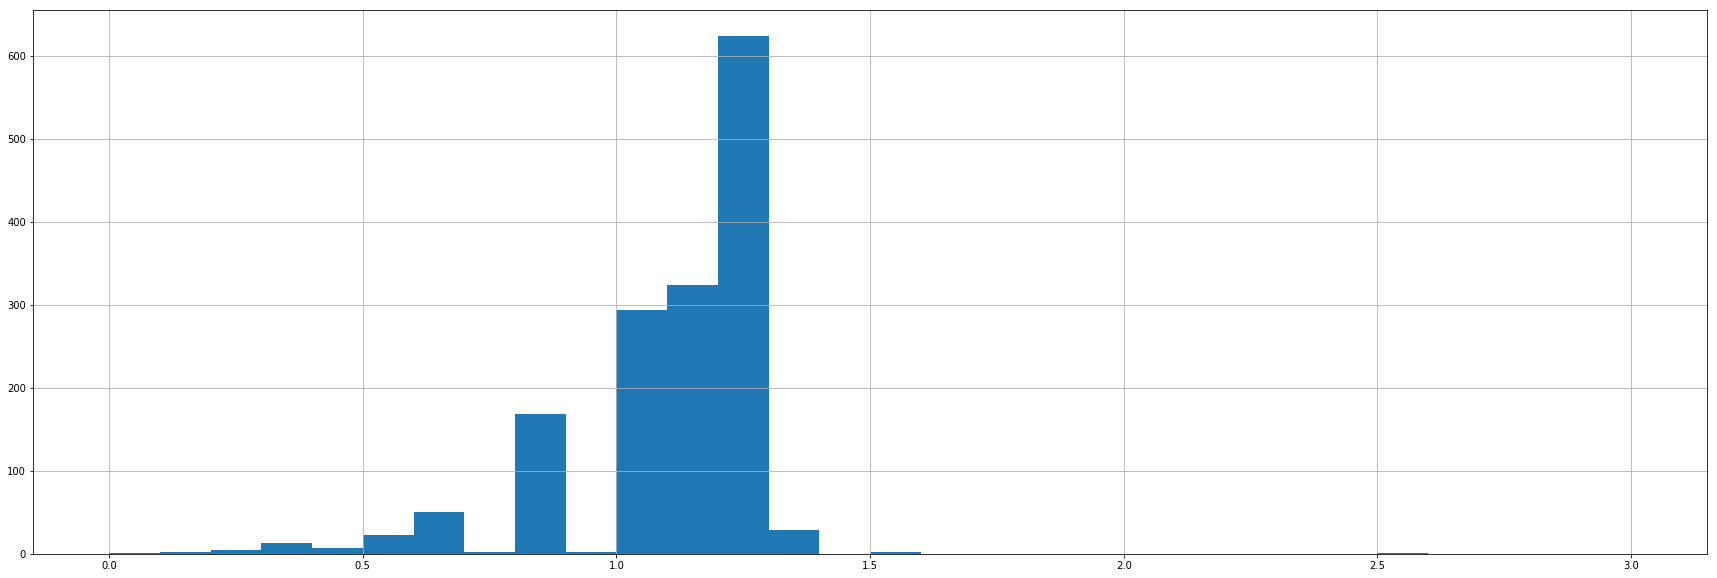

In [82]:
# ÁîªÁõ¥ÊñπÂõæËßÇÂØüËØÑÂàÜÂàÜÂ∏ÉÊÉÖÂÜµ
# Â∑¶‰æßÊï¥‰ΩìÂëàÊ≠£ÊÄÅÂàÜÂ∏ÉÔºåÂùáÂÄºÂú®1.25Â∑¶Âè≥
# Ë∂ÖËøá1.3ÂàÜÁöÑÊé®ÁâπÊï∞ÈáèÂ∞±ÂæàÂ∞ë‰∫Ü
fig = plt.figure(figsize=(30, 10))
df_copy['rating'].hist(bins=np.linspace(0, 3, 31))

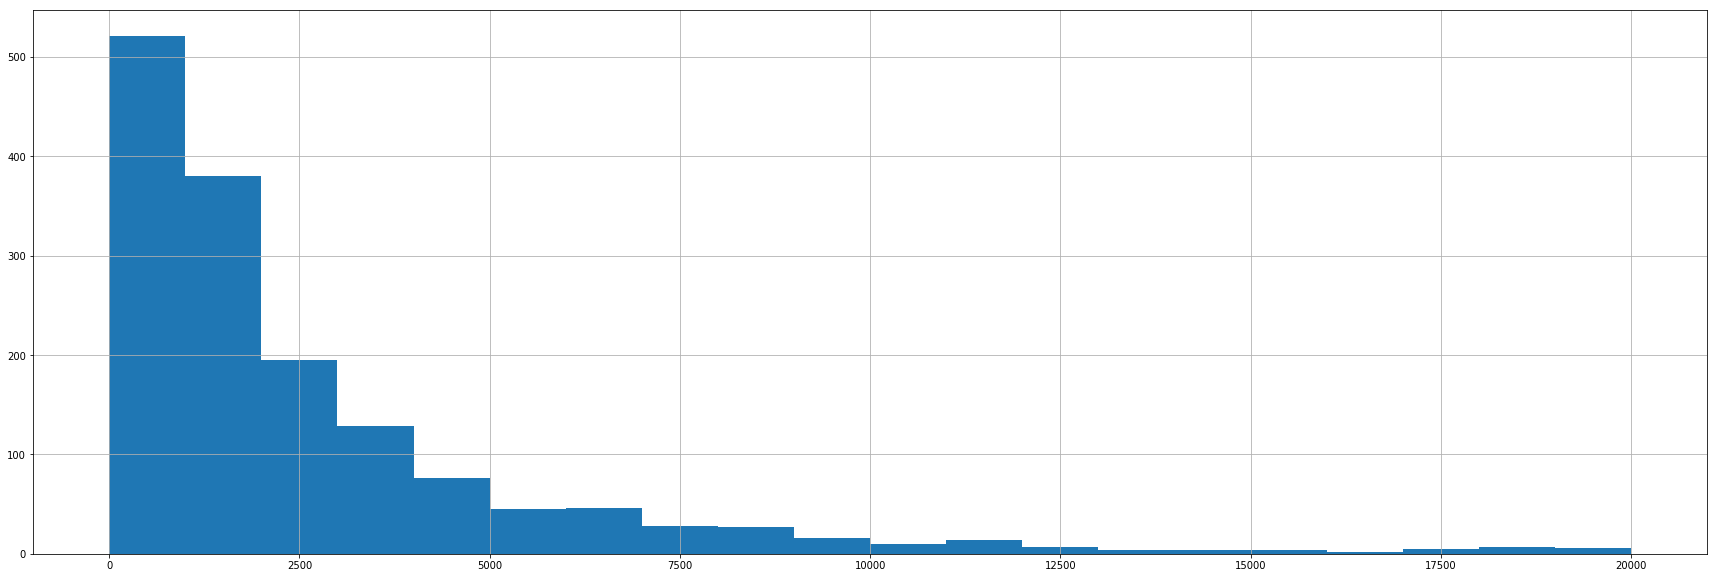

In [83]:
# ÁîªÁõ¥ÊñπÂõæËßÇÂØüËΩ¨ÂèëÊï∞ÂàÜÂ∏ÉÊÉÖÂÜµ
# Êï∞ÊçÆÂëàÂè≥ÂÄæÊñúÂàÜÂ∏É
# ËΩ¨ÂèëÊï∞Âú®0Âà∞1000ÁöÑÊé®ÁâπÊï∞ÈáèÊúÄÂ§ö
fig = plt.figure(figsize=(30, 10))
df_copy['retweet_count'].hist(bins=np.linspace(0, 20000, 21))

In [84]:
len(df_copy[df_copy['retweet_count']<11000])

1473

In [85]:
len(df_copy[df_copy['retweet_count']<10000])

1463

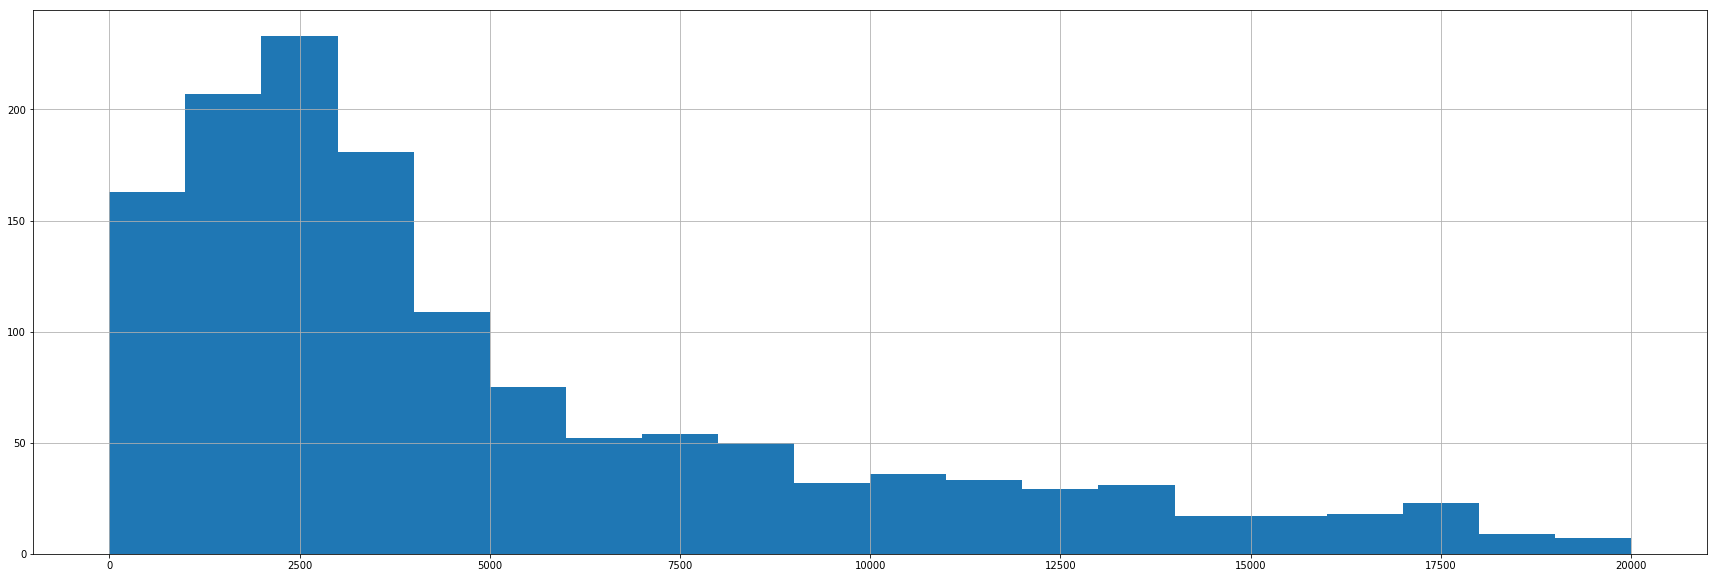

In [86]:
# ÁîªÁõ¥ÊñπÂõæËßÇÂØüÂñúÊ¨¢Êï∞ÂàÜÂ∏ÉÊÉÖÂÜµ
# Êï∞ÊçÆÂëàÂè≥ÂÄæÊñúÂàÜÂ∏É
# ËΩ¨ÂèëÊï∞Âú®2000Âà∞2500ÁöÑÊé®ÁâπÊï∞ÈáèÊúÄÂ§ö
fig = plt.figure(figsize=(30, 10))
df_copy['favorite_count'].hist(bins=np.linspace(0, 20000, 21))

In [87]:
# ÁîªÊ∞îÊ≥°Âõæ
# XËΩ¥‰∏∫ËΩ¨ÂèëÊï∞ÔºåYËΩ¥‰∏∫ÂñúÊ¨¢Êï∞ÔºåÊ∞îÊ≥°Â§ßÂ∞è‰ª£Ë°®ËØÑÂàÜÔºåÂàÜÂÄºË∂äÈ´òÊ∞îÊ≥°Ë∂äÂ§ß„ÄÇ
bubble_data = pd.DataFrame(columns=['retweet_count', 'favorite_coute', 'rating'])
bubble_data['retweet_count'] = df_copy['retweet_count']
bubble_data['favorite_coute'] = df_copy['favorite_count']
bubble_data['rating'] = df_copy['rating']

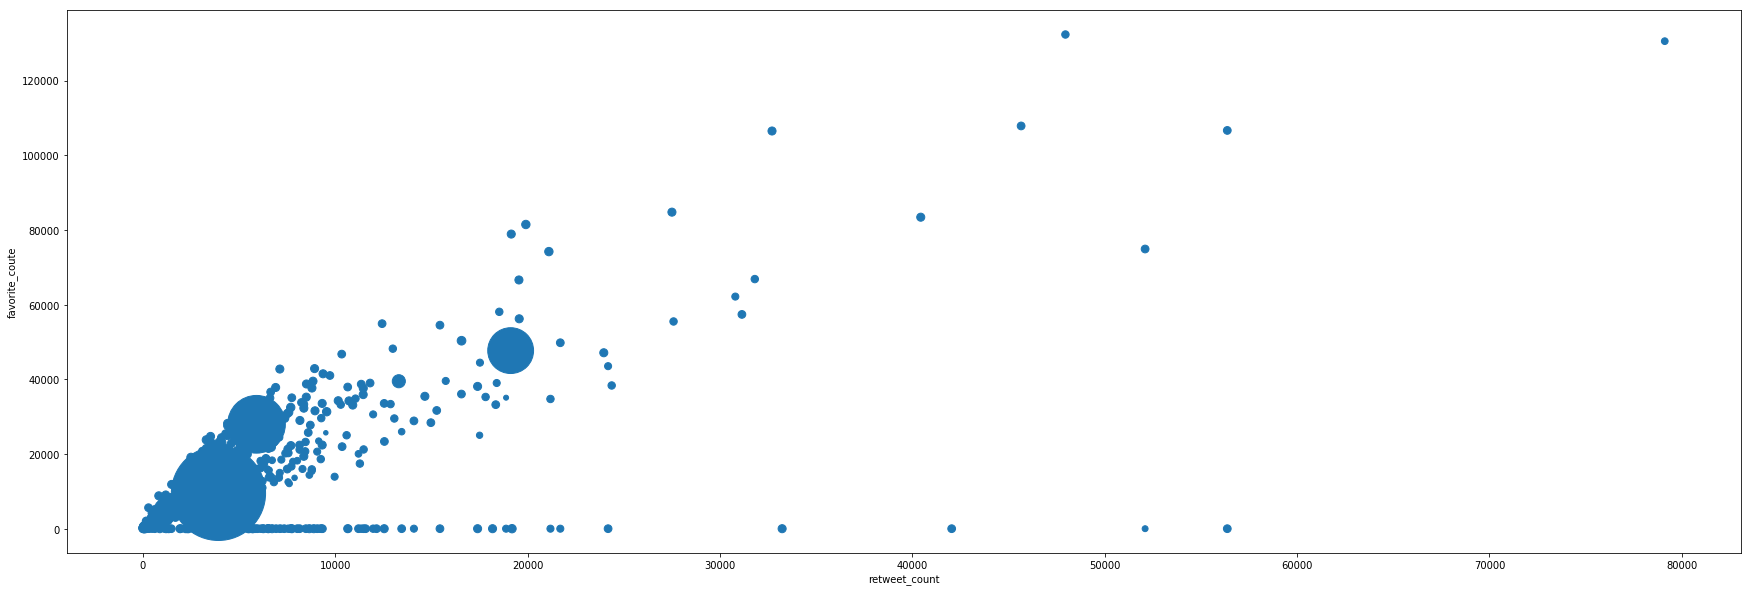

In [88]:
# ËΩ¨ÂèëÊï∞ÂíåÂñúÊ¨¢Êï∞Êï¥‰ΩìÂëàÁé∞Âá∫Ê≠£Áõ∏ÂÖ≥Ôºå
# ‰ΩÜÊòØËØÑÂàÜÊï∞‰∏éËΩ¨ÂèëÊï∞ÊàñÂñúÊ¨¢Êï∞Â∞±Ê≤°ÊúâÈùûÂ∏∏ÊòéÊòæÁöÑÁõ∏ÂÖ≥ÊÄßÔºå
# ÂèØ‰ª•ÁúãÂà∞ÊúÄÂ§ßÁöÑ‰∏â‰∏™Ê∞îÊ≥°‰πãÈó¥Êó†ËÆ∫ÊòØÂú®ËΩ¨ÂèëÊï∞ËøòÊòØÂñúÊ¨¢Êï∞‰∏äÈÉΩÊúâÊØîËæÉÊòéÊòæÁöÑÂ∑ÆÂºÇ„ÄÇ
bubble_data.plot.scatter(x='retweet_count', y='favorite_coute', s=bubble_data['rating']*50, figsize=(30, 10))

# Appendix